# Db2 Sample For H20
#### Rohith Ravindranath (rohithravin@ibm.com)
In this code sample, we will show how to use the Db2 Python driver to import data from our Db2 database. Then, we will use that data to create a machine learning model with H20.

## 1. Import Data
Let's first install and import all the libraries needed for this notebook. Most important we will be installing and importing the db2 python driver `pyspark`.

In [14]:
!pip install pyspark
!pip install findspark

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [21]:
wine = pd.read_csv('data/winequality-red.csv', sep=';') 

In [22]:
# Let's see what our data looks like
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 2. Data Exploration

In this step, we are going to try and explore our data inorder to gain insight. We hope to be able to make some assumptions of our data before we start modeling.

In [23]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [24]:
# Minimum price of the data
minimum_price = np.amin(wine['quality'])

# Maximum price of the data
maximum_price = np.amax(wine['quality'])

# Mean price of the data
mean_price = np.mean(wine['quality'])

# Median price of the data
median_price = np.median(wine['quality'])

# Standard deviation of prices of the data
std_price = np.std(wine['quality'])

# Show the calculated statistics
print("Statistics for housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for housing dataset:

Minimum price: $3
Maximum price: $8
Mean price: $5.6360225140712945
Median price $6.0
Standard deviation of prices: $0.8073168769639486


In [25]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [26]:
corr_matrix = wine.corr()
corr_matrix["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

## 3. Data Visualization

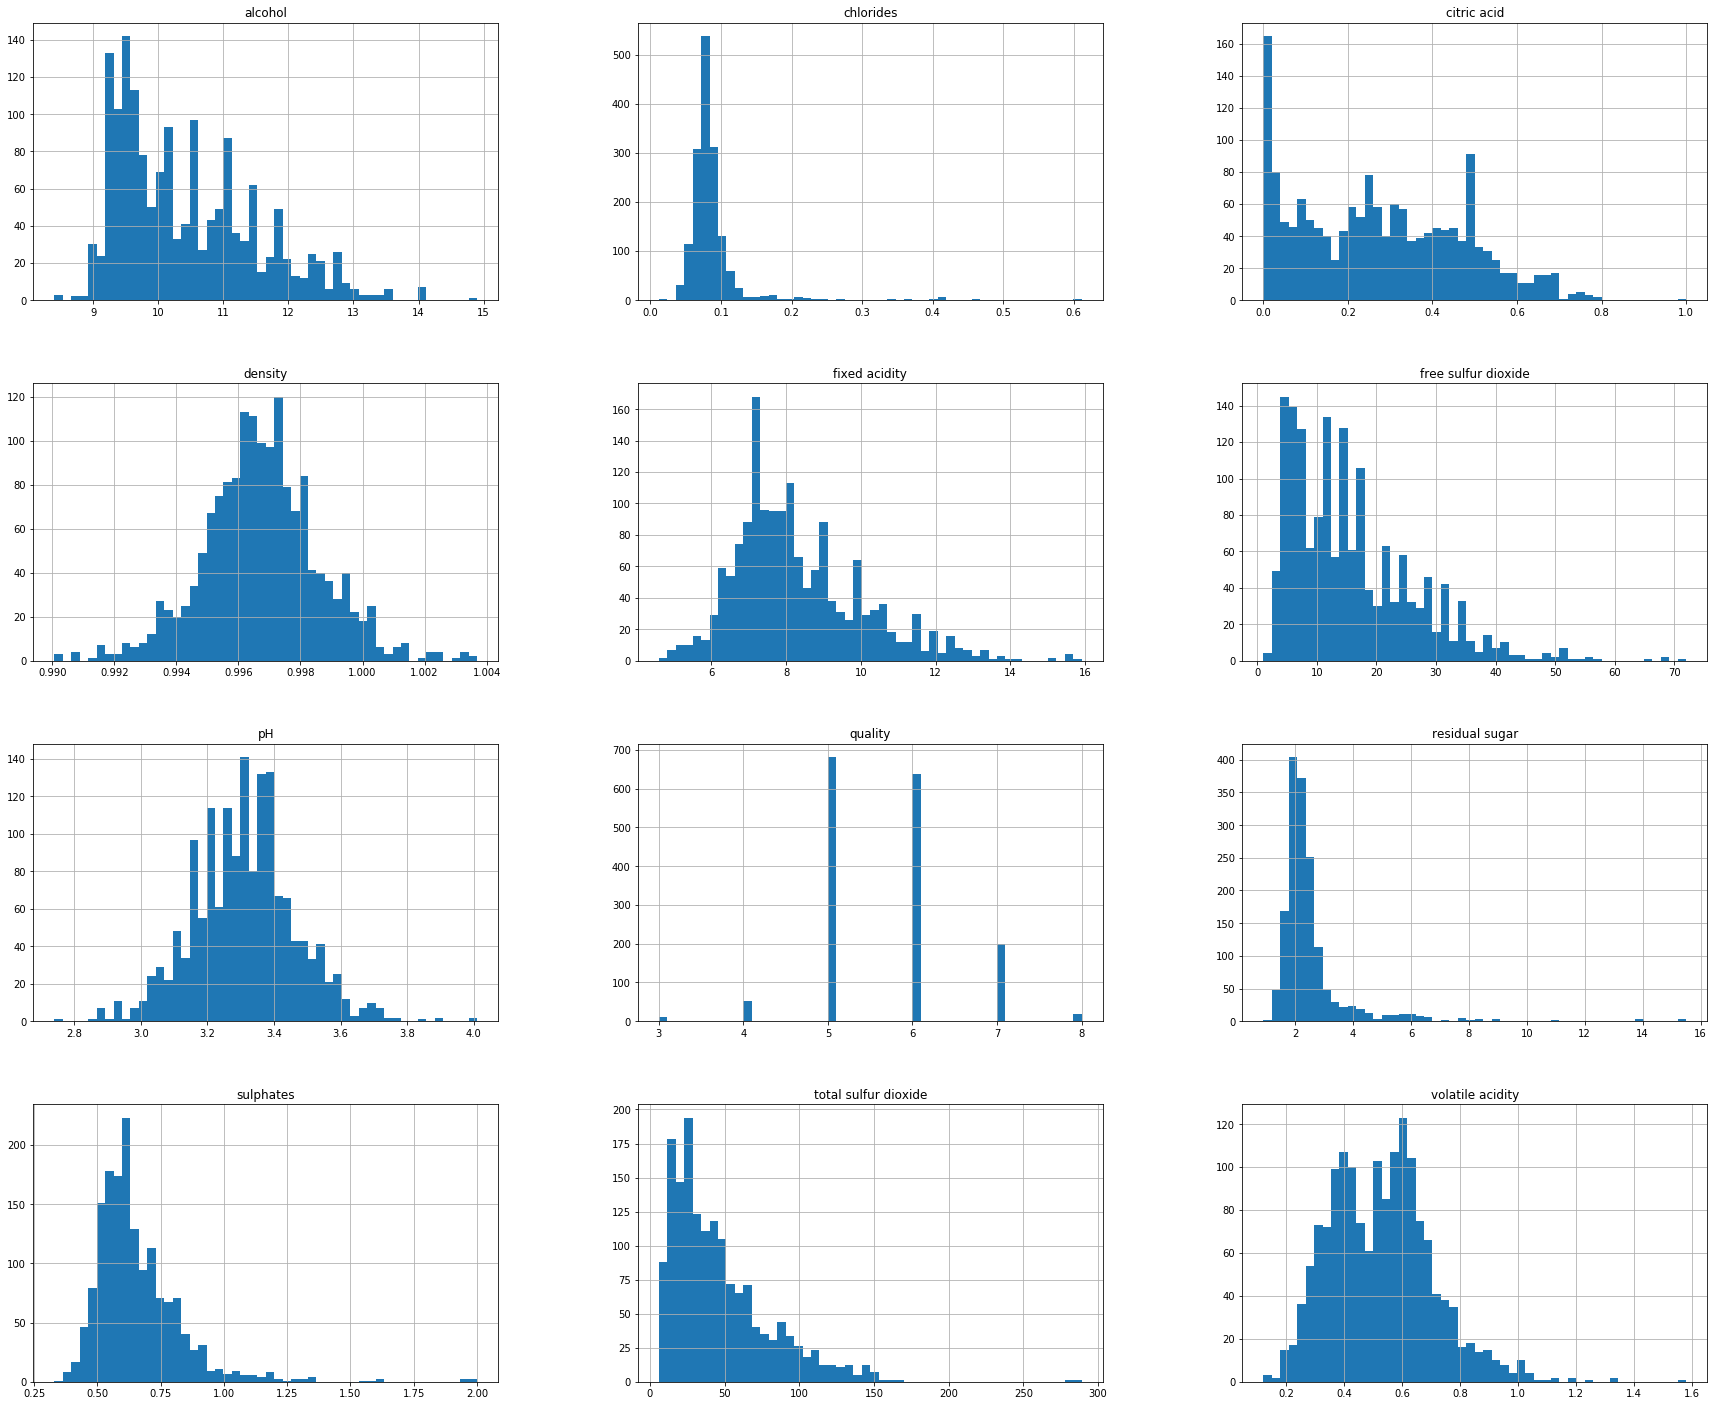

In [27]:
wine.hist(bins=50, figsize=(30,25))
plt.show()

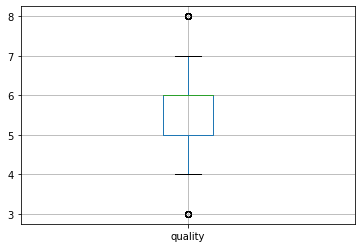

In [29]:
boxplot = wine.boxplot(column=['quality'])

## 4. Creating Machine Learning Model

Now that we have cleaned and explored our data. We are ready to build our model that will predict the attribute `Class`. 

In [31]:
import h2o

# Create an H2o session
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "10.0.2" 2018-07-17; Java(TM) SE Runtime Environment 18.3 (build 10.0.2+13); Java HotSpot(TM) 64-Bit Server VM 18.3 (build 10.0.2+13, mixed mode)
  Starting server from /Users/rohithravin/anaconda3/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/jr/9pds__1x5sb6l3wbv49zxy0r0000gn/T/tmp1you182s
  JVM stdout: /var/folders/jr/9pds__1x5sb6l3wbv49zxy0r0000gn/T/tmp1you182s/h2o_rohithravin_started_from_python.out
  JVM stderr: /var/folders/jr/9pds__1x5sb6l3wbv49zxy0r0000gn/T/tmp1you182s/h2o_rohithravin_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,America/Los_Angeles
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.2
H2O cluster version age:,6 days
H2O cluster name:,H2O_from_python_rohithravin_jbpdn0
H2O cluster total nodes:,1
H2O cluster free memory:,4 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


In [37]:
# Convert a Pandas Data Frame to H2o Frame
wine_data = h2o.H2OFrame(wine)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [38]:
# Make sure the data is no corrupted during conversion
wine_data.head(5)

fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5
11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6
7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


In [39]:
# Split the data into tran and test data
wine_split = wine_data.split_frame(ratios = [0.8], seed = 1234)
wine_train = wine_split[0] # using 80% for training
wine_test = wine_split[1] #rest 20% for testing

# Verify shape of data sets
print(wine_train.shape, wine_test.shape)

(1288, 12) (311, 12)


In [40]:
# We to define the predictors for this model
predictors = list(wine_data.columns) 

# Since we need to predict quality, let's take that out 
predictors.remove('quality')  
predictors

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [41]:
# Import the function for GLM
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

# Set up GLM for regression
glm = H2OGeneralizedLinearEstimator(family = 'gaussian', model_id = 'glm_default')

# Use .train() to build the model
glm.train(x = predictors, y = 'quality', training_frame = wine_train)

print(glm)

glm Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  glm_default

GLM Model: summary



,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
,gaussian,identity,"Elastic Net (alpha = 0.5, lambda = 7.628E-4 )",11,11,1,py_10_sid_b4ce




ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.4037973513870203
RMSE: 0.6354505105726332
MAE: 0.49232440424011054
RMSLE: 0.0974884629690151
R^2: 0.36836216144663536
Mean Residual Deviance: 0.4037973513870203
Null degrees of freedom: 1287
Residual degrees of freedom: 1276
Null deviance: 823.4006211180176
Residual deviance: 520.0909885864821
AIC: 2513.17299507517
Scoring History: 


,timestamp,duration,iterations,negative_log_likelihood,objective
,2019-08-02 15:42:34,0.000 sec,0,823.4006211,0.6392862


In [42]:
glm.model_performance(wine_test)


ModelMetricsRegressionGLM: glm
** Reported on test data. **

MSE: 0.4743580454647022
RMSE: 0.6887365573749532
MAE: 0.5409099793235218
RMSLE: 0.10770909938281377
R^2: 0.32554634234863555
Mean Residual Deviance: 0.4743580454647022
Null degrees of freedom: 310
Residual degrees of freedom: 299
Null deviance: 218.77205499402018
Residual deviance: 147.5253521395224
AIC: 676.638184381432


In [43]:
predictions = glm.predict(wine_test)
predictions.head(5)

glm prediction progress: |████████████████████████████████████████████████| 100%


predict
5.70645
5.65462
5.15559
5.25084
5.04528


## 5. H2o Auto ML 

In this section, I will walk through how to use H2o AutoML Module.

In [45]:
from h2o.automl import H2OAutoML

# Here AutoML will run for 20 base models for 100 seconds.
aml = H2OAutoML(max_models = 20, max_runtime_secs=100, seed = 1)

In [ ]:
# Training our model
aml.train(x=predictors, y='quality', training_frame=wine_train, validation_frame=wine_test)

AutoML progress: |█████████████████████████████████████████████████████

In [ ]:
# Now let us look at the automl leaderboard.
print(aml.leaderboard)

#The leaderboard displays the top 10 models built by AutoML with their parameters. 
#The best model is placed on the top is a Stacked Ensemble.